In [15]:
import requests
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [3]:
def generate_weather_api_urls(api_key, location, years_back=3):
    base_url = "http://api.worldweatheronline.com/premium/v1/past-weather.ashx"
    urls = []

    # Pobranie biezacej daty
    current_year = datetime.now().year

    # Pętla z ostatnimi 3 latami
    for year in range(current_year - years_back, current_year):
        for month in range(1, 13):  # zakres od stycznia do grudnia
            # definiowanie dnia startowego i koncowego dla kazdego miesiaca
            start_date = datetime(year, month, 1)
            if month == 12:
                end_date = datetime(year + 1, 1, 1) - timedelta(days=1)
            else:
                end_date = datetime(year, month + 1, 1) - timedelta(days=1)
            
            # Formatowanie daty do 'YYYY-MM-DD'
            start_date_str = start_date.strftime('%Y-%m-%d')
            end_date_str = end_date.strftime('%Y-%m-%d')
            
            # Tworzenie API
            url = f"{base_url}?key={api_key}&q={location}&format=json&date={start_date_str}&enddate={end_date_str}&tp=24"
            urls.append(url)

    return urls

In [4]:
def extract_weather_data(weather_data):
    extracted_data = []
    
    for day in weather_data:
        date = day["date"]
        maxtempC = day["maxtempC"]
        mintempC = day["mintempC"]
        avgtempC = day["avgtempC"]
        sunHour = day["sunHour"]
        humidity = day["hourly"][0]["humidity"]
        pressure = day["hourly"][0]["pressure"]
        
        extracted_data.append({
            "date": date,
            "maxtempC": maxtempC,
            "mintempC": mintempC,
            "avgtempC": avgtempC,
            "sunHour": sunHour,
            "humidity": humidity,
            "pressure": pressure
        })
    
    return extracted_data

# Nasz klucz oraz wybrana lokalizacja
api_key = "4597174352ee463084a193409241305"
location = "London"
urls = generate_weather_api_urls(api_key, location)

all_weather_data = []

for url in urls:
    response = requests.get(url)
    data = response.json()
    weather_data = data["data"]["weather"]
    month_weather_data = extract_weather_data(weather_data)
    all_weather_data.extend(month_weather_data)


df = pd.DataFrame(all_weather_data)
df

,date,maxtempC,mintempC,avgtempC,sunHour,humidity,pressure
0,2021-01-01,3,-1,1,4.0,86,1012
1,2021-01-02,4,0,3,1.0,85,1017
2,2021-01-03,5,0,3,4.0,84,1018
3,2021-01-04,4,2,3,1.0,80,1020
4,2021-01-05,3,1,3,1.0,91,1021
...,...,...,...,...,...,...,...
1090,2023-12-27,12,7,10,1.0,83,1008
1091,2023-12-28,11,9,11,1.0,72,1006
1092,2023-12-29,10,6,9,7.0,73,1007
1093,2023-12-30,11,6,9,1.0,80,1005


In [6]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

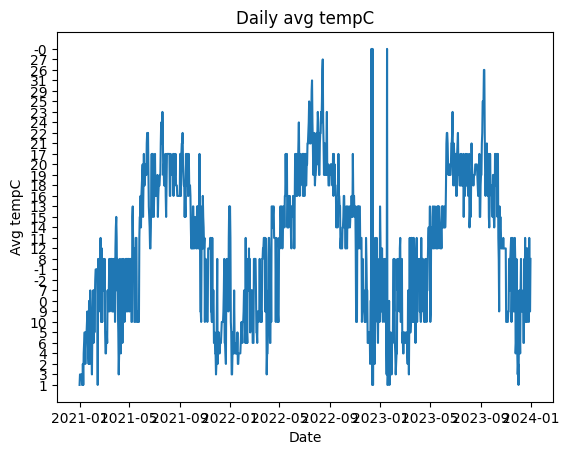

In [9]:
plt.plot(df['avgtempC'])
plt.title('Daily avg tempC')
plt.xlabel('Date')
plt.ylabel('Avg tempC')
plt.show()

In [14]:
adf_test = adfuller(df['avgtempC'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.482670
p-value: 0.008443
